# Tables for stats comparison

## Me stats

In [1]:

import pandas as pd
import glob
from utils import convert_csv_to_graph
from network import get_network_stats
import networkx as nx
import matplotlib.pyplot as plt
import csv


In [2]:

folder_path = 'data/networks/'

file_list = glob.glob(folder_path + '*_stats_*')

dfs = []

for file in file_list:
    df = pd.read_csv(file)
    dfs.append(df)

me_stats_df = pd.concat(dfs, ignore_index=True)

mean_me_stats_df = round(me_stats_df.mean(), 2)
print(mean_me_stats_df) 

number_of_nodes                    3860.82
number_of_edges                   51341.82
average_clustering_coefficient        0.55
reciprocity                           0.33
average_degree                       26.52
diameter                              7.36
average_path_length                   1.18
average_in_degree                    13.26
dtype: float64


## Twitter stats


In [3]:

# twitter_graph = convert_csv_to_graph('data/twitter/twitter_combined.csv', whole=True)


In [4]:

# twitter_stats_df = pd.DataFrame(get_network_stats(twitter_graph), index=[0])
# print(twitter_stats_df)

In [5]:

# nx.average_clustering(twitter_graph.to_undirected())
# nx.transitivity(twitter_graph.to_undirected())

## Misinformation and polarization shifts (10 networks, 200 iterations)

In [6]:
# folder_path = 'data/results/MIM/'
folder_path = 'data/results/'

file_list = glob.glob(folder_path + 'result_test_*.csv')

dfs = []

for file in file_list:
    df = pd.read_csv(file)
    dfs.append(df)
    
    
merged_df = pd.concat(dfs)


by_row_index = merged_df.groupby(merged_df.index)

result = by_row_index.mean()

print(result)

     polarization  misinformation  average_opinion_all  average_opinion_left  \
0        0.352225        0.084361             0.471595              0.460752   
1        0.131420        0.009015             0.499216              0.480337   
2        0.048773        0.003494             0.499956              0.445126   
3        0.041795        0.003424             0.500336              0.423159   
4        0.051754        0.004124             0.500633              0.407112   
..            ...             ...                  ...                   ...   
194      0.059229        0.063257             0.499451              0.432756   
195      0.059338        0.063214             0.499852              0.433641   
196      0.058662        0.063231             0.499995              0.432162   
197      0.059383        0.063314             0.500061              0.432533   
198      0.059223        0.063429             0.500066              0.434026   

     average_opinion_right  opinion_l_b

0      0.352225
1      0.131420
2      0.048773
3      0.041795
4      0.051754
         ...   
194    0.059229
195    0.059338
196    0.058662
197    0.059383
198    0.059223
Name: polarization, Length: 199, dtype: float64


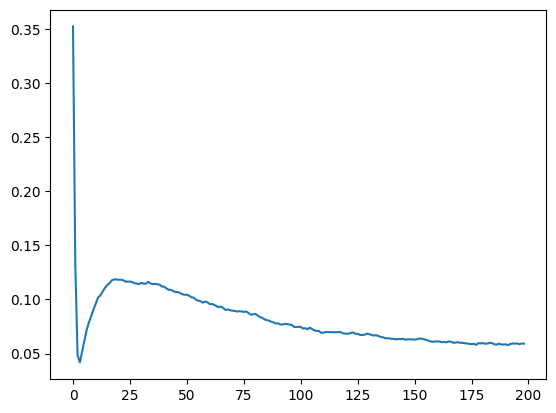

In [7]:

fig, ax = plt.subplots()

x = range(199)

y = result['polarization']

print(y)

ax.plot(x,y)
    

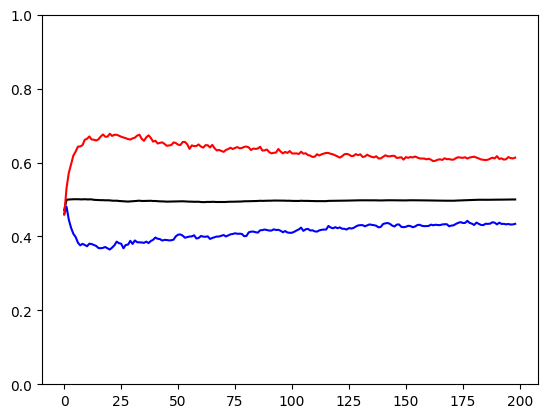

In [8]:

fig, ax = plt.subplots()

x = range(199)

y1 = result['average_opinion_all']
y2 = result['average_opinion_left']
y3 = result['average_opinion_right']

plt.ylim([0, 1])

ax.plot(x,y1,color='black')
ax.plot(x,y2, color='blue')
ax.plot(x,y3, color='red')


## SMN comparison

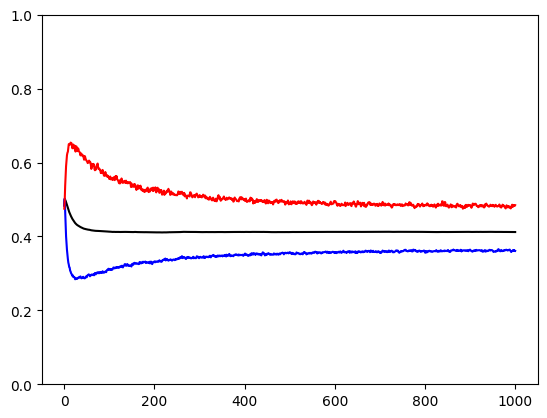

In [9]:
df1 = pd.read_csv('data/results/SMN/DF-op.csv', header=None) 
df2 = pd.read_csv('data/results/SMN/DF-opaud0.csv', header=None) 
df3 = pd.read_csv('data/results/SMN/DF-opaud1.csv', header=None) 

df1.drop(columns=[0], inplace=True)
df2.drop(columns=[0], inplace=True)
df3.drop(columns=[0], inplace=True)


y1 = df1.mean(axis=0)
y2 = df2.mean(axis=0)
y3 = df3.mean(axis=0)



fig, ax = plt.subplots()

x = range(0, 1001)
plt.ylim([0, 1])

ax.plot(x,y1,color='black')
ax.plot(x,y2, color='blue')
ax.plot(x,y3, color='red')



1       0.484856
2       0.501092
3       0.499087
4       0.496369
5       0.492867
          ...   
997     0.411954
998     0.412010
999     0.411956
1000    0.411977
1001    0.411919
Length: 1001, dtype: float64


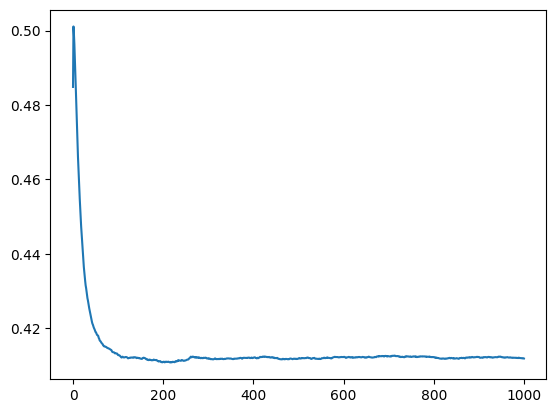

In [10]:
df = pd.read_csv('data/results/SMN/DFpol.csv', header=None) 
df.drop(columns=[0], inplace=True)
y = df1.mean(axis=0)


print(y)
fig, ax = plt.subplots()

x = range(0, 1001)
ax.plot(x,y)
